# Session – 4: The Loss Function and Risk Function

## Tutorial - 4

### A)

#### a)

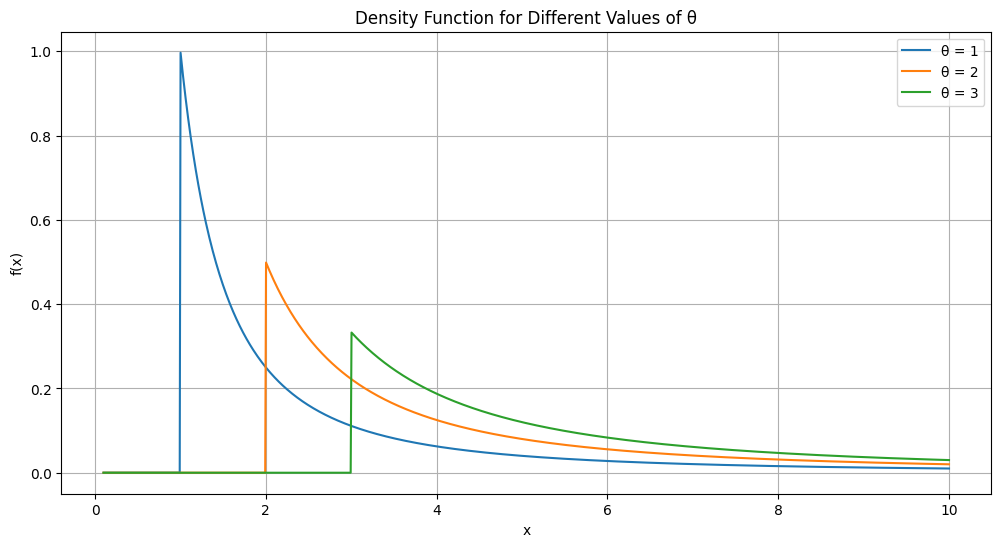

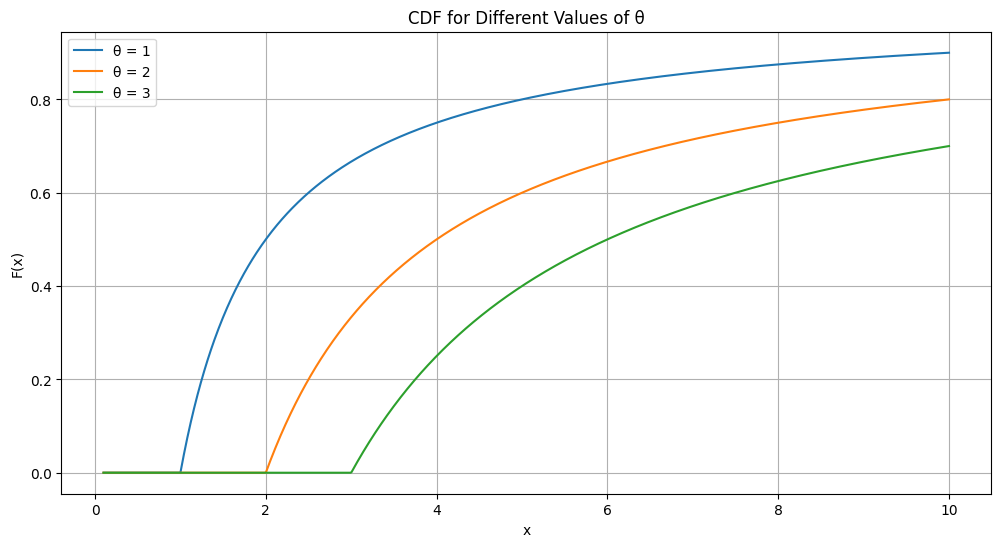

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the density function f(x)
def density_function(x, theta):
    return np.where(x > theta, theta / x**2, 0)

# Define the CDF
def cdf_function(x, theta):
    return np.where(x > theta, 1 - (theta / x), 0)

# Values of theta to be plotted
theta_values = [1, 2, 3]

# X values for plotting
x = np.linspace(0.1, 10, 1000)

# Plotting the density function
plt.figure(figsize=(12, 6))
for theta in theta_values:
    y = density_function(x, theta)
    plt.plot(x, y, label=f'θ = {theta}')
plt.title('Density Function for Different Values of θ')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.grid(True)
plt.show()

# Plotting the CDF
plt.figure(figsize=(12, 6))
for theta in theta_values:
    y = cdf_function(x, theta)
    plt.plot(x, y, label=f'θ = {theta}')
plt.title('CDF for Different Values of θ')
plt.xlabel('x')
plt.ylabel('F(x)')
plt.legend()
plt.grid(True)
plt.show()



#### b)


To find the Maximum Likelihood Estimator (MLE) for $ \theta $ given the density function:

$$ f(x) = 
\begin{cases} 
\frac{\theta}{x^2}, & x > \theta \\
0, & \text{otherwise}
\end{cases} $$

**Step-by-Step Solution:**

1. **Likelihood Function:**

Given a random sample $ X_1, X_2, \ldots, X_n $ from the distribution, the likelihood function $ L(\theta) $ is the product of the individual densities:

$$ L(\theta) = \prod_{i=1}^{n} f(x_i) = \prod_{i=1}^{n} \frac{\theta}{x_i^2} $$

Assuming $ x_i > \theta $ for all $ i $.

2. **Log-Likelihood Function:**

To simplify the calculations, we take the natural logarithm of the likelihood function:

$$ \log L(\theta) = \sum_{i=1}^{n} \log \left( \frac{\theta}{x_i^2} \right) = \sum_{i=1}^{n} \left( \log \theta - \log x_i^2 \right) $$

$$ \log L(\theta) = n \log \theta - \sum_{i=1}^{n} \log x_i^2 $$

3. **Maximizing the Log-Likelihood:**

To find the MLE, we take the derivative of the log-likelihood with respect to $ \theta $ and set it to zero:

$$ \frac{d}{d\theta} \log L(\theta) = \frac{d}{d\theta} \left( n \log \theta - \sum_{i=1}^{n} \log x_i^2 \right) $$

$$ \frac{d}{d\theta} \log L(\theta) = \frac{n}{\theta} $$

Setting the derivative to zero to find the maximum:

$$ \frac{n}{\theta} = 0 $$

This does not yield a valid solution. However, we must consider the constraint $ \theta \leq x_{(1)} $, where $ x_{(1)} = \min(X_1, X_2, \ldots, X_n) $. The likelihood is maximized when $ \theta $ is as large as possible but less than or equal to $ x_{(1)} $. Hence, the MLE for $ \theta $ is:

$$ \hat{\theta} = \min(X_1, X_2, \ldots, X_n) $$

4. **Bias of the MLE:**

To check whether the MLE is unbiased, we need to compute $ E[\hat{\theta}] $:

Given that $ X_{(1)} $ is the minimum of $ n $ independent identically distributed random variables, the cumulative distribution function (CDF) of $ X_{(1)} $ is:

$$ F_{X_{(1)}}(x) = 1 - \left( 1 - F_X(x) \right)^n $$  ( amiya sir will teach you how to find this, still in doubt come to me.)

Since $ F_X(x) = 1 - \frac{\theta}{x} $ for $ x \geq \theta $:

$$ F_{X_{(1)}}(x) = 1 - \left( \frac{\theta}{x} \right)^n $$

The probability density function (PDF) of $ X_{(1)} $ is:

$$ f_{X_{(1)}}(x) = \frac{d}{dx} F_{X_{(1)}}(x) = n \frac{\theta^n}{x^{n+1}} $$

Then, the expected value $ E[\hat{\theta}] $ is:

$$ E[\hat{\theta}] = \int_{\theta}^{\infty} x f_{X_{(1)}}(x) \, dx = \int_{\theta}^{\infty} x n \frac{\theta^n}{x^{n+1}} \, dx $$

$$ E[\hat{\theta}] = n \theta^n \int_{\theta}^{\infty} \frac{1}{x^n} \, dx $$

$$ E[\hat{\theta}] = n \theta^n \left[ -\frac{1}{(n-1)x^{n-1}} \right]_{\theta}^{\infty} $$

$$ E[\hat{\theta}] = n \theta^n \left( \frac{1}{(n-1)\theta^{n-1}} \right) $$

$$ E[\hat{\theta}] = \frac{n}{n-1} \theta $$

Thus, the MLE is biased, but the bias diminishes as $ n $ increases.

**Conclusion:**

- **MLE:** $ \hat{\theta} = \min(X_1, X_2, \ldots, X_n) $
- **Bias:** The MLE is biased with $ E[\hat{\theta}] = \frac{n}{n-1} \theta $. The bias decreases with larger $ n $.


#### c)

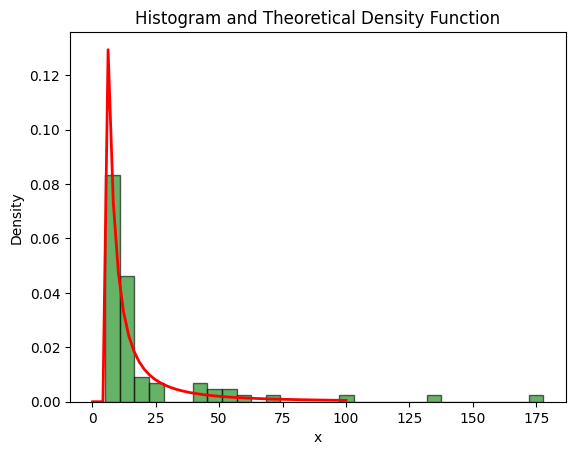

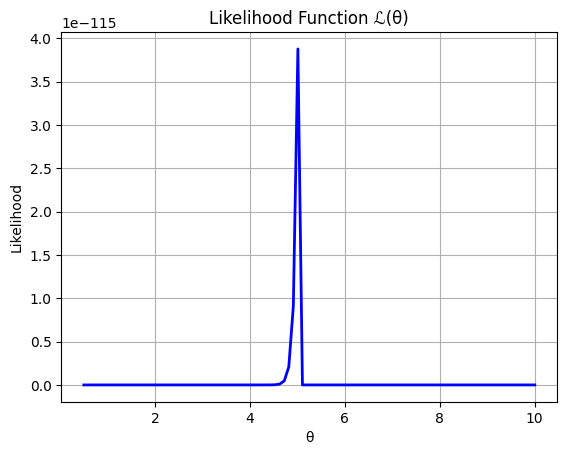

In [62]:
import matplotlib.pyplot as plt
import numpy as np

# Define the density function f(x) for the given distribution
def density_function(x, θ):
    return np.where(x > θ, θ / x**2, 0)

# Define the likelihood function
def likelihood(θ, x):
        return np.prod(density_function(x,θ))

# Parameter for the distribution
θ = 5

# Number of samples to generate
n = 75

# Generate n uniform random samples between 0 and 1
u = np.random.uniform(0, 1, n)

# Transform the uniform random samples to follow the given distribution
x = θ * (1 - u)**(-1)

# Define θ values to evaluate the likelihood function
θ_vals = np.linspace(0.5, 10, 100)

# Calculate the likelihood values for each θ
likelihood_vals = [likelihood(i, x) for i in θ_vals]

# Plot the histogram of the samples with density normalization
plt.hist(x, density=True, bins=30, alpha=0.6, color='g', edgecolor='black')

# Define the x values for plotting the theoretical density function
x_val = np.linspace(0.1, 100, 50)



# Plot the theoretical density function
plt.plot(x_val, density_function(x_val, θ), 'r-', lw=2)

# Adding labels and title for better readability
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram and Theoretical Density Function')

# Show the plot
plt.show()

# Plot the likelihood function
plt.plot(θ_vals, likelihood_vals, 'b-', lw=2)
plt.xlabel('θ')
plt.ylabel('Likelihood')
plt.title('Likelihood Function ℒ(θ)')
plt.grid(True)
plt.show()


#### d)

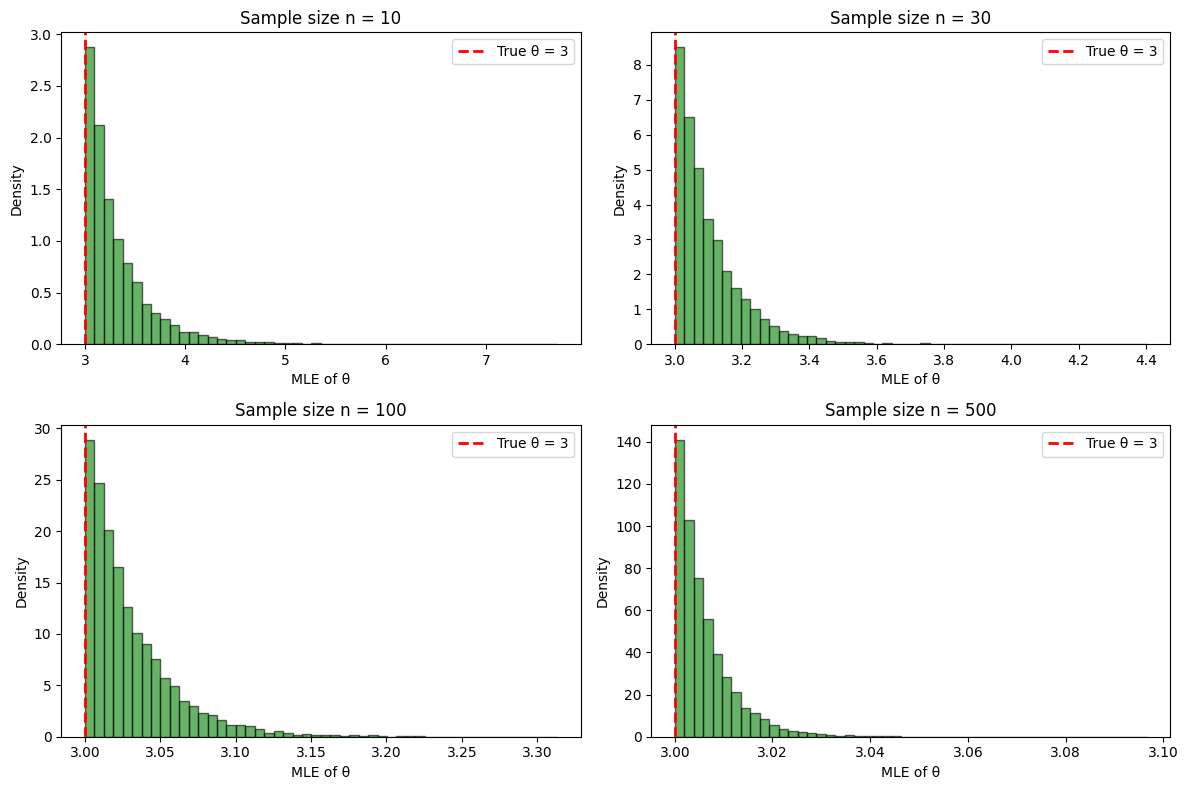

Sample size n = 10: Mean of MLE = 3.328588591035676, Variance of MLE = 0.14006243977461652
Sample size n = 30: Mean of MLE = 3.1028243357806886, Variance of MLE = 0.010824360242315647
Sample size n = 100: Mean of MLE = 3.030300392570228, Variance of MLE = 0.0009117391536969555
Sample size n = 500: Mean of MLE = 3.0060492846179847, Variance of MLE = 3.766144234398634e-05
As the sample size increase and variance decreases hence it is asymptotically unbaised


In [68]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter for the distribution
θ = 3

# Number of simulations
M = 10**4 

# Sample sizes to evaluate
sample_sizes = [10, 30, 100, 500]

# Function to generate samples and compute the MLE for a given sample size
def simulate_mle(θ, n, M):
    # Store MLEs
    mle_samples = np.zeros(M)
    
    for i in range(M):
        # Generate uniform random samples
        u = np.random.uniform(0, 1, n)
        # Transform the uniform random samples to follow the given distribution
        x = θ * (1 - u)**(-1)
        # Compute the MLE (minimum of the sample)
        mle_samples[i] = np.min(x)
    
    return mle_samples

# Dictionary to store results for each sample size
results = {}

# Perform simulations for each sample size
for n in sample_sizes:
    mle_samples = simulate_mle(θ, n, M)
    results[n] = mle_samples

# Plot the sampling distribution of MLEs for each sample size
plt.figure(figsize=(12, 8))

for i, n in enumerate(sample_sizes):
    plt.subplot(2, 2, i+1)
    plt.hist(results[n], bins=50, density=True, alpha=0.6, color='g', edgecolor='black')
    plt.axvline(x=θ, color='r', linestyle='dashed', linewidth=2, label=f'True θ = {θ}')
    plt.xlabel('MLE of θ')
    plt.ylabel('Density')
    plt.title(f'Sample size n = {n}')
    plt.legend()

plt.tight_layout()
plt.show()

# Calculate the mean and variance of the MLEs for each sample size
for n in sample_sizes:
    mean_mle = np.mean(results[n])
    var_mle = np.var(results[n])
    print(f'Sample size n = {n}: Mean of MLE = {mean_mle}, Variance of MLE = {var_mle}')

print("As the sample size increase and variance decreases hence it is asymptotically unbaised")

# we will see ahead the visualization of asymptotically unbaised




#### e) and f)

In [63]:
#####g and #####h


import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 100
θ = 2
M = 1000  # Note: Use a consistent number of simulations

# Lists to store losses
absolute_loss = []
squared_loss = []

# Monte Carlo simulation
for i in range(M):
    # Generate n uniform random numbers
    u = np.random.uniform(0, 1, n)
    
    # Generate n exponential random variables
    x = θ / (1 - u)
    
    # Estimate λ
    θ_hat = np.min(x)
    
    # Compute absolute loss and squared loss
    absolute_loss.append(np.abs(θ_hat - θ))
    squared_loss.append((θ_hat - θ)**2)


# Calculate and print the average risks
absolute_risk = np.mean(absolute_loss)
squared_risk = np.mean(squared_loss)

print(f"Absolute Risk: {absolute_risk:.4f}")
print(f"Squared Risk: {squared_risk:.4f}")



Absolute Risk: 0.0214
Squared Risk: 0.0010


#### g)


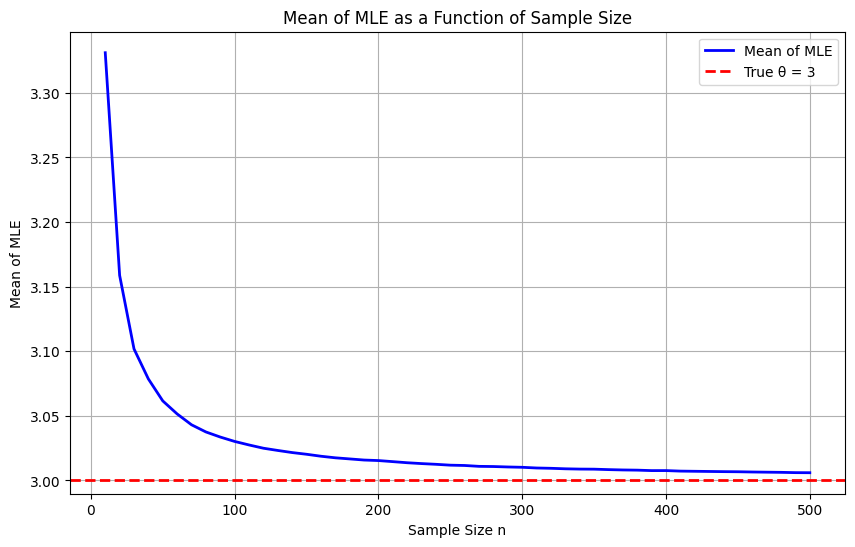

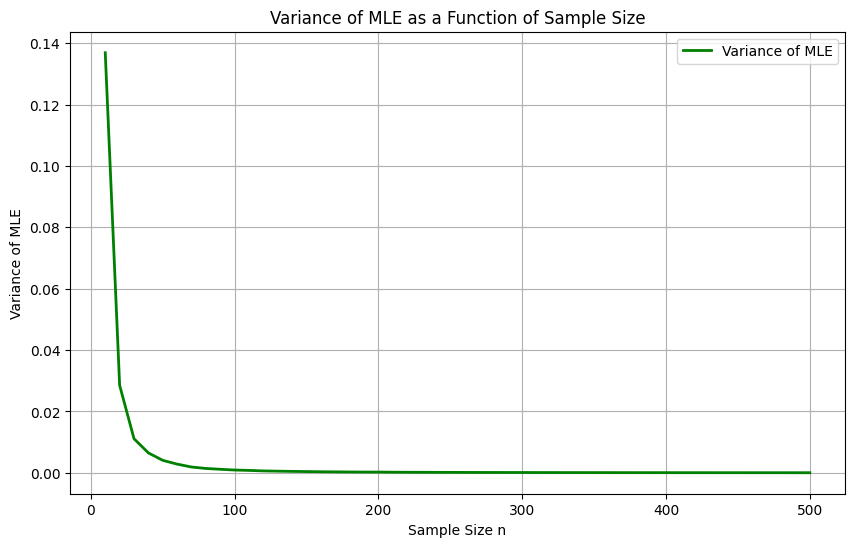

In [67]:
import numpy as np
import matplotlib.pyplot as plt

# Parameter for the distribution
θ = 3

# Number of simulations
M = 10**4

# Function to generate samples and compute the MLE for a given sample size
def simulate_mle(θ, n, M):
    # Store MLEs
    mle_samples = np.zeros(M)
    
    for i in range(M):
        # Generate uniform random samples
        u = np.random.uniform(0, 1, n)
        # Transform the uniform random samples to follow the given distribution
        x = θ * (1 - u)**(-1)
        # Compute the MLE (minimum of the sample)
        mle_samples[i] = np.min(x)
    
    return mle_samples

# Sample sizes to evaluate
n_vals = np.arange(10, 510, 10)

# Arrays to store the mean and variance of the MLEs
mean_mle_vals = []
var_mle_vals = []

# Perform simulations for each sample size
for n in n_vals:
    mle_samples = simulate_mle(θ, n, M)
    mean_mle_vals.append(np.mean(mle_samples))
    var_mle_vals.append(np.var(mle_samples))

# Plot the mean of MLE as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(n_vals, mean_mle_vals, 'b-', lw=2, label='Mean of MLE')
plt.axhline(y=θ, color='r', linestyle='dashed', linewidth=2, label=f'True θ = {θ}')
plt.xlabel('Sample Size n')
plt.ylabel('Mean of MLE')
plt.title('Mean of MLE as a Function of Sample Size')
plt.legend()
plt.grid(True)
plt.show()

# Plot the variance of MLE as a function of sample size
plt.figure(figsize=(10, 6))
plt.plot(n_vals, var_mle_vals, 'g-', lw=2, label='Variance of MLE')
plt.xlabel('Sample Size n')
plt.ylabel('Variance of MLE')
plt.title('Variance of MLE as a Function of Sample Size')
plt.legend()
plt.grid(True)
plt.show()

# # Print the mean and variance for each sample size
# for n, mean_mle, var_mle in zip(n_vals, mean_mle_vals, var_mle_vals):
#     print(f'Sample size n = {n}: Mean of MLE = {mean_mle}, Variance of MLE = {var_mle}')


### B)

#### a)

In [88]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Number of trials in the Bernoulli distribution (n=1 for Bernoulli)
n = 10

# True parameter for the Bernoulli distribution
θ = 0.5

# Number of Monte Carlo simulations
M = 1000

# Lists to store losses
absolute_loss = []
squared_loss = []

# Monte Carlo simulation
for i in range(M):
    # Generate n samples from a Bernoulli distribution with parameter θ
    x = np.random.binomial(n=1, p=θ, size=n)  # We can get Bernoulli distribution values by keeping n=1
    
    # Estimate θ using the method of moments (sample mean)
    θ_hat = np.mean(x)
    
    # Compute absolute loss and squared loss
    absolute_loss.append(np.abs(θ_hat - θ))
    squared_loss.append((θ_hat - θ)**2)

# Calculate the average absolute loss (absolute risk)
absolute_risk = np.mean(absolute_loss)

# Calculate the average squared loss (squared risk)
squared_risk = np.mean(squared_loss)

# Print the results
print(f"Absolute Risk: {absolute_risk:.4f}")
print(f"Squared Risk: {squared_risk:.4f}")


Absolute Risk: 0.1229
Squared Risk: 0.0243


#### b)


In [89]:
######## b

# MLE for this is mean of sample see keep notes for solution 
# hence risk function would be the same as method of moments 

import random
import numpy as np
import matplotlib.pyplot as plt


θ = 0.5 # random.choice(np.linaspace(0,0.5,10000))
n = 10
M = 1000  # Note: Use a consistent number of simulations

# Lists to store losses
absolute_loss = []
squared_loss = []

# Monte Carlo simulation
for i in range(M):
    # Generate n samples from a Bernoulli distribution with parameter θ
    x = np.random.binomial(n=1, p=θ, size=n)  # We can get Bernoulli distribution values by keeping n=1
    
    # Estimate θ using the method of moments (sample mean)
    θ_hat = np.mean(x)
    
    # Compute absolute loss and squared loss
    absolute_loss.append(np.abs(θ_hat - θ))
    squared_loss.append((θ_hat - θ)**2)

absolute_risk = np.mean(absolute_loss)
squared_risk = np.mean(squared_loss)

print(f"Absolute Risk: {absolute_risk:.4f}")
print(f"Squared Risk: {squared_risk:.4f}")





Absolute Risk: 0.1257
Squared Risk: 0.0254


#### c)

both the estimators are same, so we cannot do the comparision 

#### d)

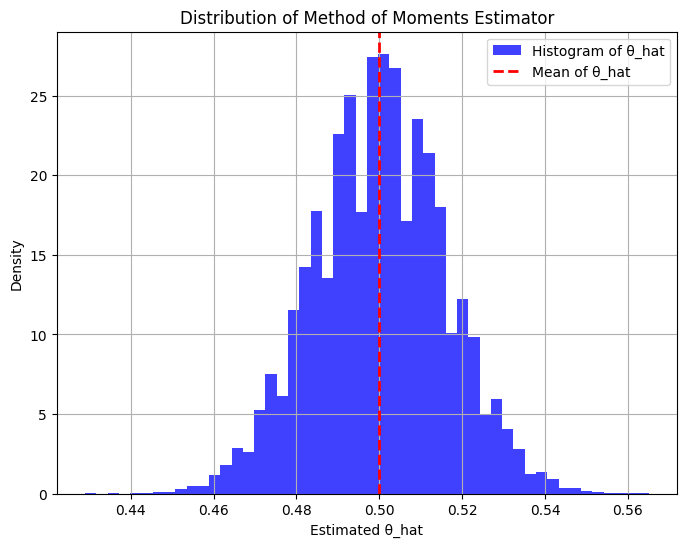

In [91]:

import numpy as np
import matplotlib.pyplot as plt

# Parameters
θ = 0.5  # True probability parameter (not used directly in this simulation)
n = 1000  # Number of samples per simulation
M = 10**5 

# List to store estimated theta_hat values
theta_hat = []

# Perform Monte Carlo simulation
for _ in range(M):
    x = np.random.binomial(1,θ,n)
    
    # Calculate the method of moments estimator (mean of x)
    theta_hat.append(np.mean(x))

# Plotting the histogram of estimated theta_hat values
plt.figure(figsize=(8, 6))
plt.hist(theta_hat, bins=50, density=True, alpha=0.75, color='b', label='Histogram of θ_hat')
plt.axvline(np.mean(theta_hat), color='r', linestyle='dashed', linewidth=2, label='Mean of θ_hat')
plt.xlabel('Estimated θ_hat')
plt.ylabel('Density')
plt.title('Distribution of Method of Moments Estimator')
plt.legend()
plt.grid(True)
plt.show()


### C)

#### a)

In [5]:
import numpy as np

def simulate_geometric(p, n):
    # Generate n random numbers from Uniform(0,1)
    uniform_random_numbers = np.random.uniform(0, 1, n)
    
    # Apply the inverse transform method to generate Geometric(p) random numbers
    geometric_random_numbers = np.ceil(np.log(1 - uniform_random_numbers) / np.log(1 - p))
    
    return geometric_random_numbers

# Parameters
p = 0.3  # Choose p in (0,1)
n = 10  # Choose the number of random variables to generate

# Simulate the random numbers
geometric_random_numbers = simulate_geometric(p, n)

print("Generated Geometric random numbers: ", geometric_random_numbers)


Generated Geometric random numbers:  [3. 6. 2. 3. 2. 1. 4. 1. 2. 1.]


#### b)

In [148]:
import numpy as np
from scipy.optimize import minimize

# Negative log-likelihood function
def negloglikelihood(param, x):
    p = param
    return -np.log(np.prod(st.geom.pmf(x,p)))


# True parameter value
p_true = 0.4
# Sample size
n = 100
# Generate a sample from the Geometric distribution with parameter p_true
x = np.random.geometric(p_true, n)

# Initial guess for the optimization algorithm
initial_guess = [0.9]  # Initial guess as a list

# Minimize the negative log-likelihood function to estimate p
result = minimize(negloglikelihood, initial_guess, args=(x,), method='Nelder-Mead')


# Extract the estimated parameter value
p_mle = result.x[0]

print("MLE of p:", p_mle)


MLE of p: 0.41326171875000023


#### c)

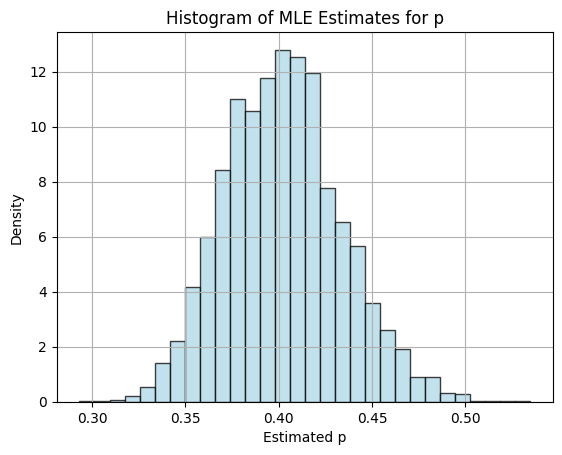

In [149]:
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt
import scipy.stats as st


# Negative log-likelihood function
def negloglikelihood(param, x):
    p = param
    return -np.log(np.prod(st.geom.pmf(x,p)))

# Number of simulations
M = 10**4

# True parameter value
p_true = 0.4

# Sample size for each simulation
n = 100

# List to store Maximum Likelihood Estimates (MLE) of p
p_mle_list = []

for _ in range(M):
    # Generate a sample from the Geometric distribution with parameter p_true
    x = np.random.geometric(p_true, n)
    
    # Initial guess for the optimization algorithm
    initial_guess = [0.6]
    
    # Minimize the negative log-likelihood function to estimate p
    result = minimize(negloglikelihood, initial_guess, args=(x,), method='Nelder-Mead')
    
    # Store the estimated parameter value
    p_mle_list.append(result.x[0])

# Plot the histogram of the MLE estimates
plt.hist(p_mle_list, bins=30, density=True, alpha=0.75, color='lightblue', edgecolor='black')
plt.title('Histogram of MLE Estimates for p')
plt.xlabel('Estimated p')
plt.ylabel('Density')
plt.grid(True)
plt.show()


#### d)

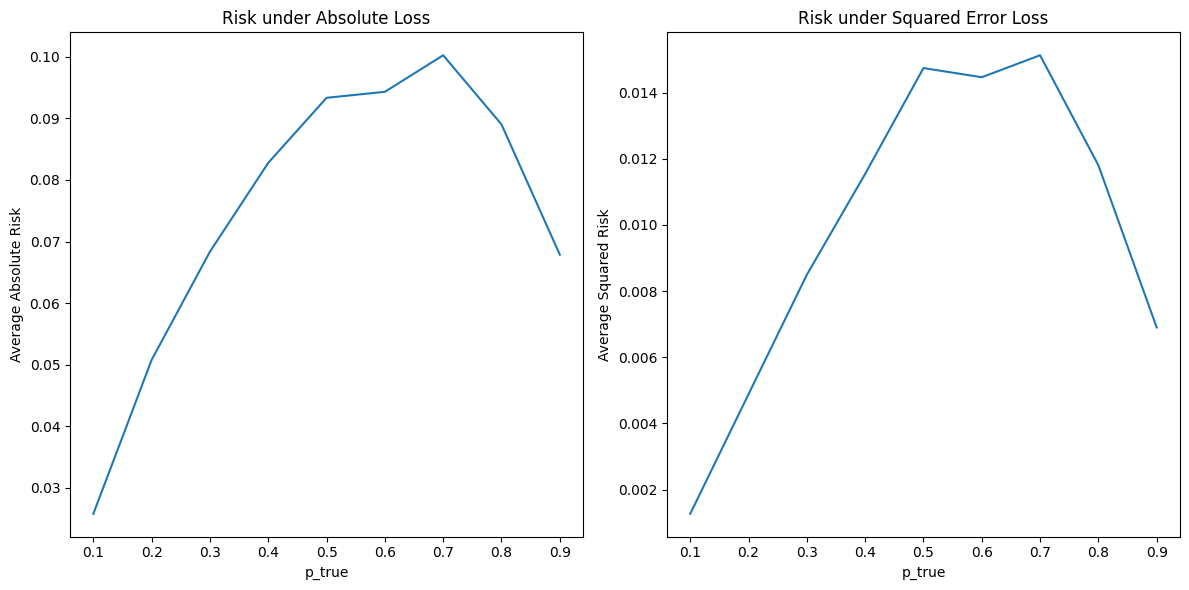

In [130]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
import scipy.stats as st

# Negative log-likelihood function
def negloglikelihood(param, x):
    p = param
    return -np.log(np.prod(st.geom.pmf(x,p)))
            
# Initialize lists to store risks for MLE
absolute_risk_mle = []
squared_risk_mle = []

# Range of p_true values to consider
p_true_values = np.arange(0.1, 1, 0.1)  # Corrected to be within the valid range of geometric p

# Monte Carlo simulation for each p_true value
for p_true in p_true_values:
    n = 10
    M = 1000  # Number of simulations
    
    # Initialize lists to store losses for MLE
    absolute_loss_mle = []
    squared_loss_mle = []
    
    # Monte Carlo simulation
    for i in range(M):
        # Generate geometric random variables
        x = np.random.geometric(p_true, n)
        
        # Initial guess for the optimization algorithm
        initial_guess = [0.3]
        
        # Minimize the negative log-likelihood function to estimate p
        result = minimize(negloglikelihood, initial_guess, args=(x,), method='Nelder-Mead')
        
        estimated_p = result.x[0]
        absolute_loss_mle.append(abs(estimated_p - p_true))
        squared_loss_mle.append((estimated_p - p_true)**2)
        
    # Calculate average risks for MLE
    absolute_risk_mle.append(np.mean(absolute_loss_mle))
    squared_risk_mle.append(np.mean(squared_loss_mle))

# Plotting the risk functions for MLE
plt.figure(figsize=(12, 6))

# Plot for absolute loss
plt.subplot(1, 2, 1)
plt.plot(p_true_values, absolute_risk_mle)
plt.title("Risk under Absolute Loss")
plt.xlabel("p_true")
plt.ylabel("Average Absolute Risk")

# Plot for squared error loss
plt.subplot(1, 2, 2)
plt.plot(p_true_values, squared_risk_mle)
plt.title("Risk under Squared Error Loss")
plt.xlabel("p_true")
plt.ylabel("Average Squared Risk")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()




#### e)

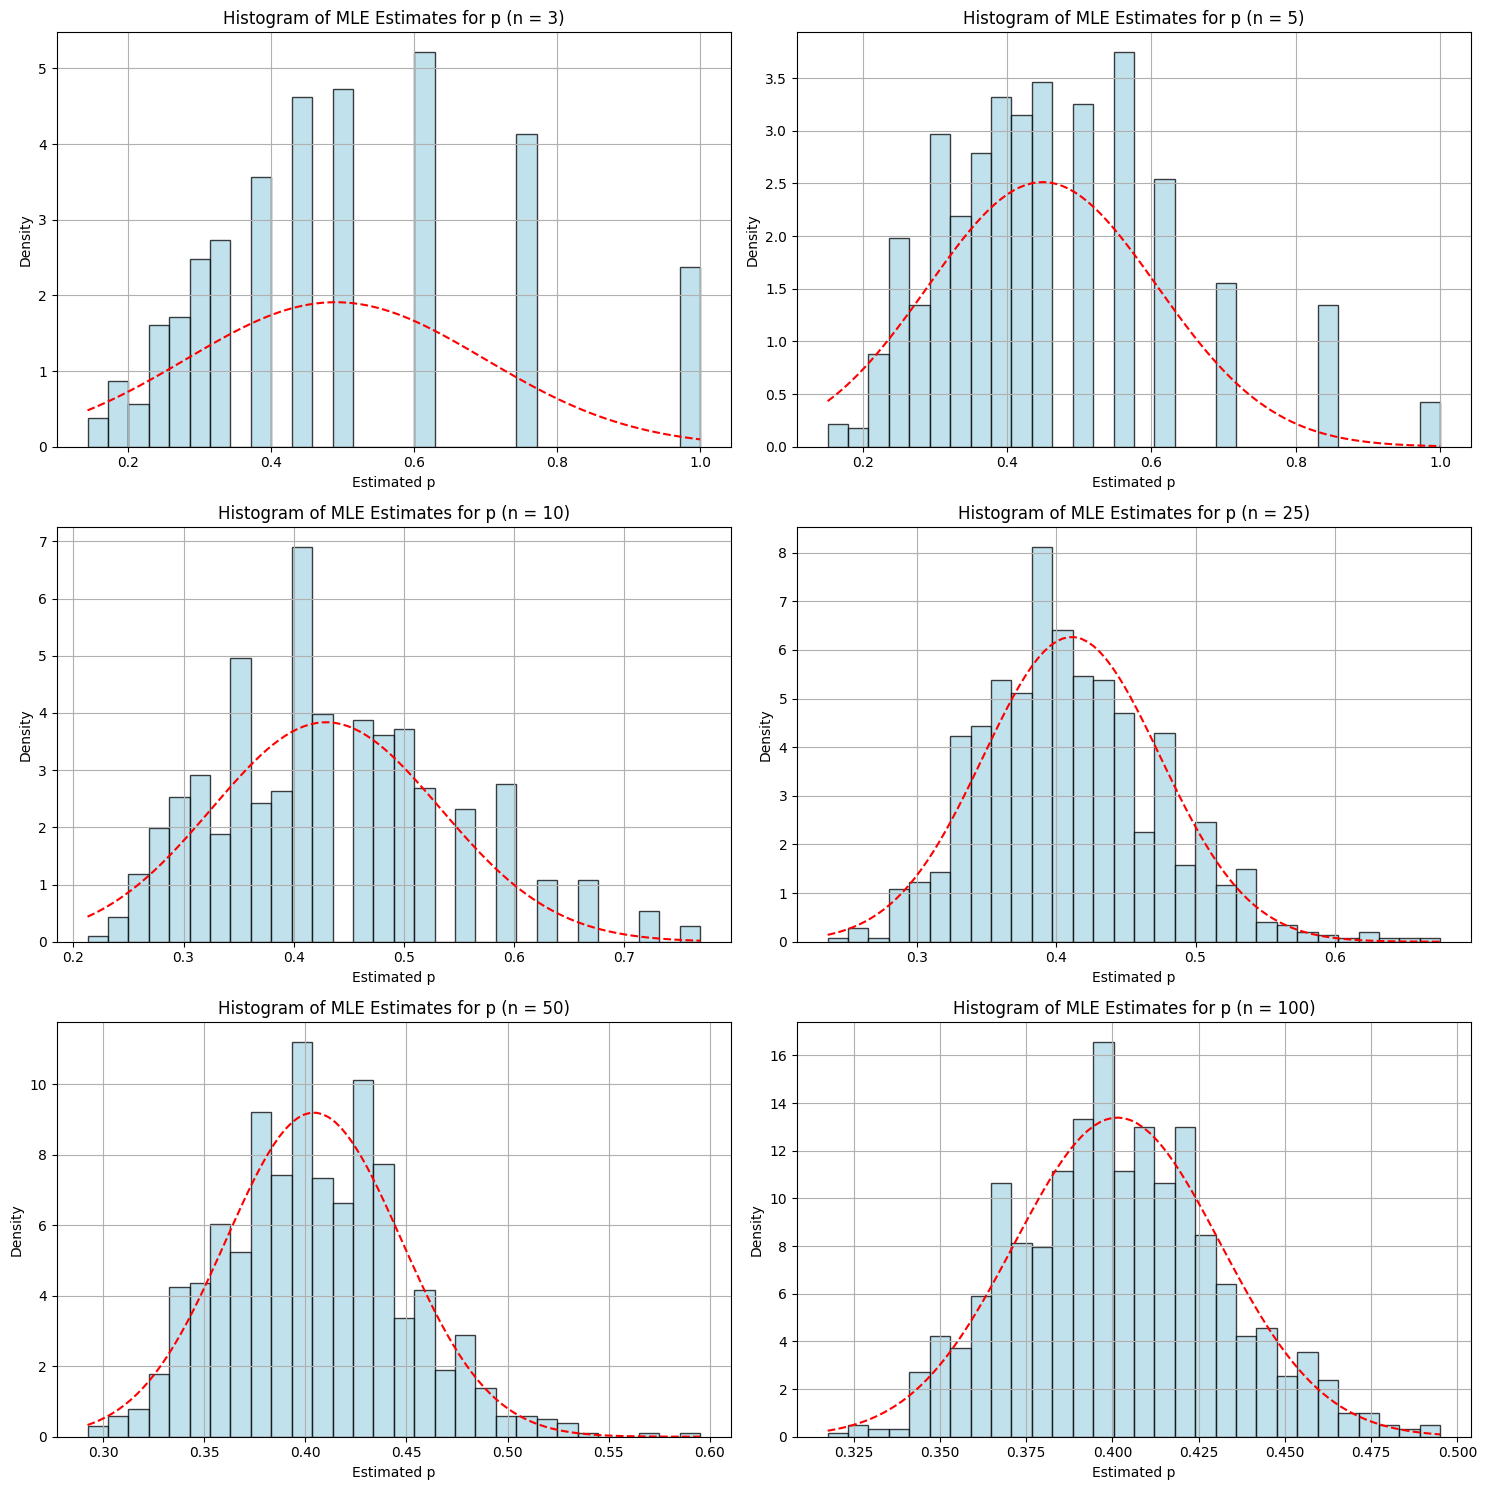

In [150]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from scipy.stats import norm


# Different sample sizes
n_vals = [3, 5, 10, 25, 50, 100]
M = 10**3
p_true = 0.4

# Set up the plot
plt.figure(figsize=(15, 15))

for i, n in enumerate(n_vals):
    p_mle_list = []
    
    for _ in range(M):
        # Generate a sample from the Geometric distribution with parameter p_true
        x = np.random.geometric(p_true, n)
        
        # Initial guess for the optimization algorithm
        initial_guess = [0.5]
        
        # Minimize the negative log-likelihood function to estimate p
        result = minimize(negloglikelihood, initial_guess, args=(x,), method='Nelder-Mead')
        
        # Store the estimated parameter value
        p_mle_list.append(result.x[0])
    
    # Convert the list to a numpy array
    p_mle_array = np.array(p_mle_list)
    
    # Plot the histogram of the MLE estimates
    plt.subplot(3, 2, i + 1)
    plt.hist(p_mle_array, bins=30, density=True, alpha=0.75, color='lightblue', edgecolor='black')
    
    # Calculate the mean and standard deviation of the MLE estimates
    mean_mle = np.mean(p_mle_array)
    sd_mle = np.std(p_mle_array)
    
    # Generate the normal distribution with the calculated mean and standard deviation
    x_vals = np.linspace(min(p_mle_array), max(p_mle_array), 100)
    y_vals = norm.pdf(x_vals, mean_mle, sd_mle)
    
    # Plot the normal distribution
    plt.plot(x_vals, y_vals, 'r--')
    
    # Set plot title and labels
    plt.title(f'Histogram of MLE Estimates for p (n = {n})')
    plt.xlabel('Estimated p')
    plt.ylabel('Density')
    plt.grid(True)

# Adjust layout
plt.tight_layout()
plt.show()


### Handout - 4

#### Part - I

In this handout, we will estimate the rate parameter 𝜆 for Exponential(𝜆) distribution using the
Maximum Likelihood Method. We shall compute the risk function of the MLE of 𝜆 ($\widehat{\lambda_n}$, say) using
computer simulation. We shall compute $MSE_𝜆(\widehat{\lambda_n}) = E(\widehat{\lambda_n}− 𝜆)^2 = E ( 1/
\overline{X_n}− 𝜆)^2 $
as the function of 𝜆,
which is the risk function under the squared error loss. We shall also compute the same under the
absolute error loss, that is $E |  1/
\overline{X_n}− 𝜆|$.


#### (a) 

Set 𝜆 = 2 and defining the exponential PDF and simulation from the PDF

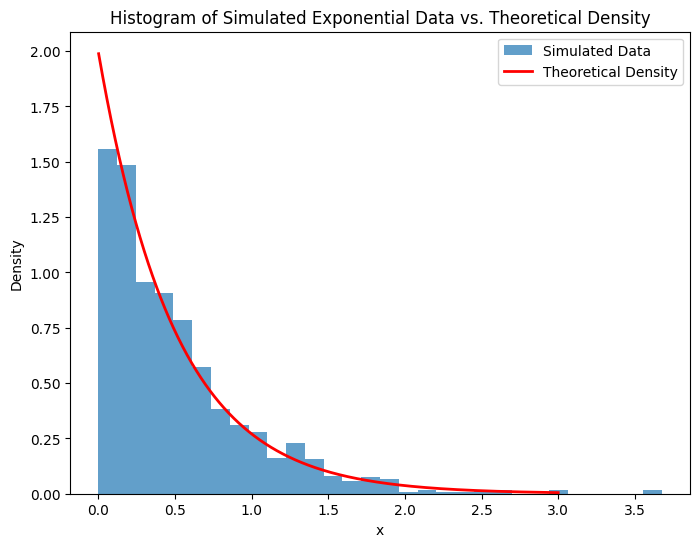

In [151]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
λ = 2
n = 1000

# Define the exponential density function
def f(x):
    return np.where(x > 0, λ * (np.exp(-λ * x)), np.nan)

# Simulate random variables from the exponential distribution
u = np.random.uniform(0, 1, n)
x = -(1 / λ) * np.log(1 - u)

# Plotting
plt.figure(figsize=(8, 6))  # Set figure size

# Plot histogram of simulated data
plt.hist(x, density=True, bins=30, alpha=0.7, label='Simulated Data')

# Plot the theoretical exponential density function
x_values = np.linspace(0, 3, 1000)
plt.plot(x_values, f(x_values), 'r-', linewidth=2, label='Theoretical Density')

# Add labels and title
plt.xlabel('x')
plt.ylabel('Density')
plt.title('Histogram of Simulated Exponential Data vs. Theoretical Density')
plt.legend()

# Show plot
plt.show()


b) 

We can also check whether the MLE is consistent estimator of $\lambda$.

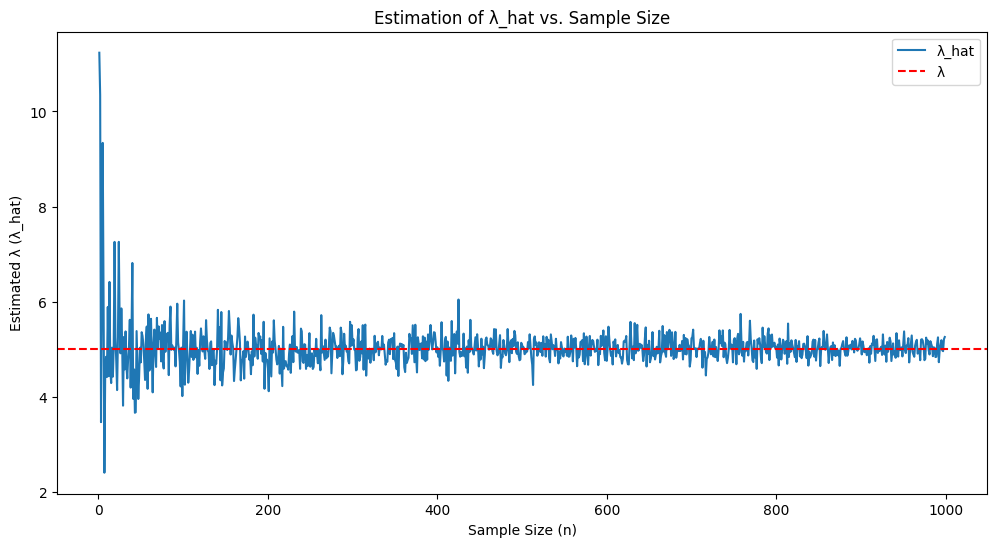

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define the true parameter λ
λ = 5

# Create a list of sample sizes ranging from 1 to 999
n_vals = [i for i in range(1, 1000)]

# Initialize an empty list to store the estimated values of λ (λ_hat)
λ_hat = []

# Loop over the sample sizes
for i in range(1, 1000):
    # Generate i random numbers from a uniform distribution between 0 and 1
    u = np.random.uniform(0, 1, i)
    
    # Apply the inverse transform sampling method to generate i random numbers
    # from an exponential distribution with rate parameter λ
    x = -(λ**-1) * np.log(1 - u)
    
    # Estimate λ using the sample mean of the generated exponential random variables
    lam_hat = 1 / np.mean(x)
    
    # Append the estimated λ to the list
    λ_hat.append(lam_hat)

# Plot the estimated λ (λ_hat) against the sample size
plt.figure(figsize=(12, 6))
plt.plot(n_vals, λ_hat, label="λ_hat")

# Plot the true λ as a horizontal red dashed line
plt.axhline(λ, color="red", linestyle="--", label='λ')

# Label the x-axis as 'Sample Size (n)'
plt.xlabel('Sample Size (n)')

# Label the y-axis as 'Estimated λ (λ_hat)'
plt.ylabel('Estimated λ (λ_hat)')

# Set the title of the plot
plt.title('Estimation of λ_hat vs. Sample Size')

# Add a legend to the plot
plt.legend()

# Display the plot
plt.show()


#### c)

You are encouraged to obtain the sampling distribution of $\frac{1}{\overline{X_n}}$ for different values of n and try to
see how the distribution behaves for large n. Can you relate the shape with a well-known result
from statistics? (Hint: The exact sampling distribution of $\widehat{\lambda_n}$ is given by: 
$
f_{\widehat{\lambda}_n}(y) = 
\begin{cases} 
\frac{e^{-\frac{n\lambda}{y}} y^{-(n+1)} (n\lambda)^n}{\Gamma(n)}, & \text{if } y > 0 \\
0, & \text{otherwise}
\end{cases}
$

Also show that $ E(\widehat{\lambda_n}^m) = \frac{\Gamma(n-m)}{\Gamma(n)}, n>m$
. Obtain the analytical expression for the risk
function of $\widehat{\lambda_n}$ and plot it against  $\lambda$

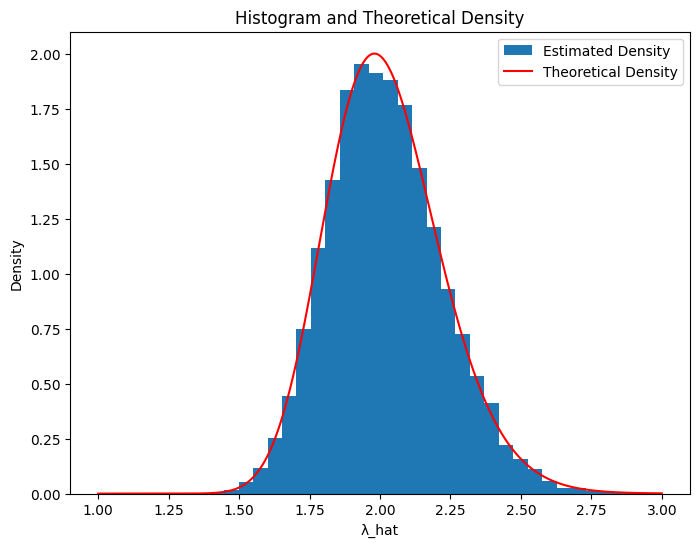

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from math import gamma

# Parameters
λ = 2
n = 100
M = 10000

# Simulation
λ_hat = []
for i in range(M):
    u = np.random.uniform(0, 1, n)
    x = -(1/λ) * np.log(1 - u)
    λ_hat.append(1 / np.mean(x))

# Define theoretical density function
def f_λ_hat(y):
    return np.where((y > 0), (np.exp(-n * λ / y) * y**(-1 - n) * (n * λ)**n) / gamma(n), 0)

# Plotting
plt.figure(figsize=(8, 6))

# Plot histogram of λ_hat
plt.hist(λ_hat, density=True, bins=30, label='Estimated Density')

# Plot theoretical density function f_λ_hat(y)
y_values = np.linspace(1, 3, 1000)
plt.plot(y_values, f_λ_hat(y_values), 'r', label='Theoretical Density')

plt.title('Histogram and Theoretical Density')
plt.xlabel('λ_hat')
plt.ylabel('Density')
plt.legend()

plt.show()


#### d)

Computation of risk function (which is the average of the loss function) under both squared and
absolute error loss at a fixed value of $\lambda $. Here we fix $\lambda$ = 2 and n = 10 for simulation.

Absolute Risk: 0.5531
Squared Risk: 0.6025


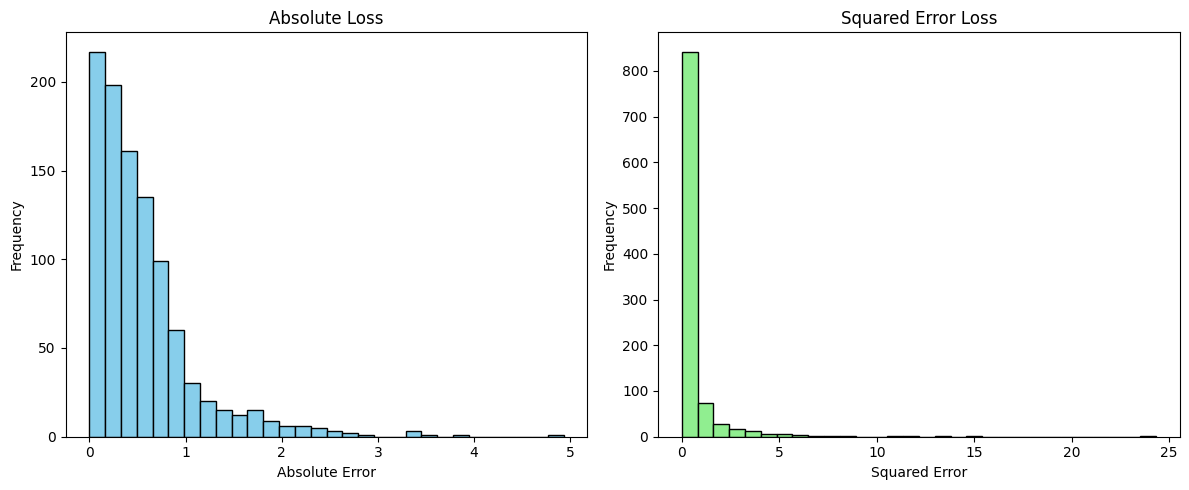

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
n = 10
λ = 2
M = 1000  # Note: Use a consistent number of simulations

# Lists to store losses
absolute_loss = []
squared_loss = []

# Monte Carlo simulation
for i in range(M):
    # Generate n uniform random numbers
    u = np.random.uniform(0, 1, n)
    
    # Generate n exponential random variables
    x = -(1/λ) * np.log(1 - u)
    
    # Estimate λ
    lam_hat = 1 / np.mean(x)
    
    # Compute absolute loss and squared loss
    absolute_loss.append(np.abs(lam_hat - λ))
    squared_loss.append((lam_hat - λ)**2)

# Plotting the histograms of losses
plt.figure(figsize=(12, 5))

# Plot for absolute loss
plt.subplot(1, 2, 1)
plt.hist(absolute_loss, bins=30, color='skyblue', edgecolor='black')
plt.title("Absolute Loss")
plt.xlabel("Absolute Error")
plt.ylabel("Frequency")

# Plot for squared error loss
plt.subplot(1, 2, 2)
plt.hist(squared_loss, bins=30, color='lightgreen', edgecolor='black')
plt.title("Squared Error Loss")
plt.xlabel("Squared Error")
plt.ylabel("Frequency")

# Calculate and print the average risks
absolute_risk = np.mean(absolute_loss)
squared_risk = np.mean(squared_loss)

print(f"Absolute Risk: {absolute_risk:.4f}")
print(f"Squared Risk: {squared_risk:.4f}")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### e)

Approximate the risk function at all values of $\lambda$.

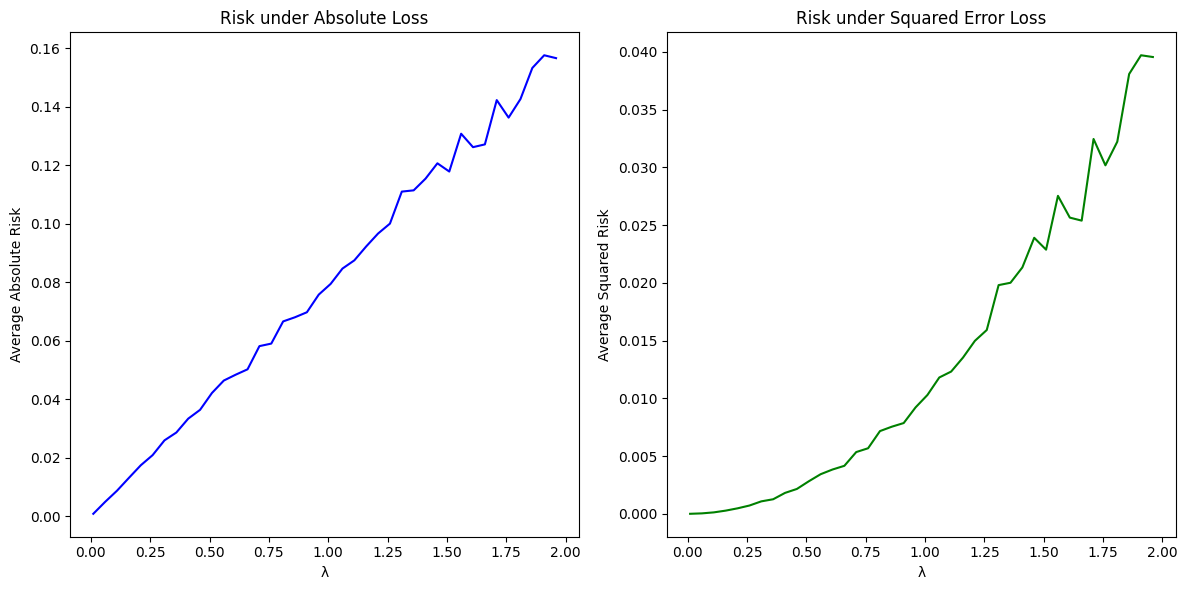

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store risks
absolute_risk = []
squared_risk = []

# Range of lambda values to consider
λ = np.arange(0.01, 2, 0.05)

# Monte Carlo simulation for each lambda value
for lam in λ:
    n = 100
    M = 1000  # Note: Use a consistent number of simulations
    absolute_loss = []
    squared_loss = []
    
    # Monte Carlo simulation
    for i in range(M):
        # Generate n uniform random numbers
        u = np.random.uniform(0, 1, n)
        
        # Generate n exponential random variables
        x = -(lam**-1) * np.log(1 - u)
        
        # Estimate lambda_hat
        lam_hat = 1 / np.mean(x)
        
        # Compute absolute loss and squared loss
        absolute_loss.append(np.abs(lam_hat - lam))
        squared_loss.append((lam_hat - lam)**2)
    
    # Calculate average risks for the current lambda value
    absolute_risk.append(np.mean(absolute_loss))
    squared_risk.append(np.mean(squared_loss))

# Plotting the risk functions
plt.figure(figsize=(12, 6))

# Plot for absolute loss
plt.subplot(1, 2, 1)
plt.plot(λ, absolute_risk, color='blue')
plt.title("Risk under Absolute Loss")
plt.xlabel("λ")
plt.ylabel("Average Absolute Risk")

# Plot for squared error loss
plt.subplot(1, 2, 2)
plt.plot(λ, squared_risk, color='green')
plt.title("Risk under Squared Error Loss")
plt.xlabel("λ")
plt.ylabel("Average Squared Risk")

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### f)

For given two estimators, we can plot the risk functions of those two loss functions under both
squared error and absolute loss function and compare them. If the risk function of $T_2$ lies
completely below the risk function $T_1$ when the loss function is considered under the squared
error loss, we should choose $T_2$ . Note that the choice of the loss function is very important here.
If $T_2$ is better than $T_1$ under the squared error loss function, that does not imply that it will also
be better than $T_1$ under the absolute error loss function as well. Repeat the step (e) for $T_1$ = $ 1/\overline{X_n} $
and $T_2$ = $\frac{1}{2} (X_{(1)} + X_{(n)})$, where $X_{(1)} = min(X_1,\ldots,X_n) $ and $X_{(n)} = max(X_1,\ldots,X_n) $ and
compare their risk function under the squared error loss. Which one would you prefer?

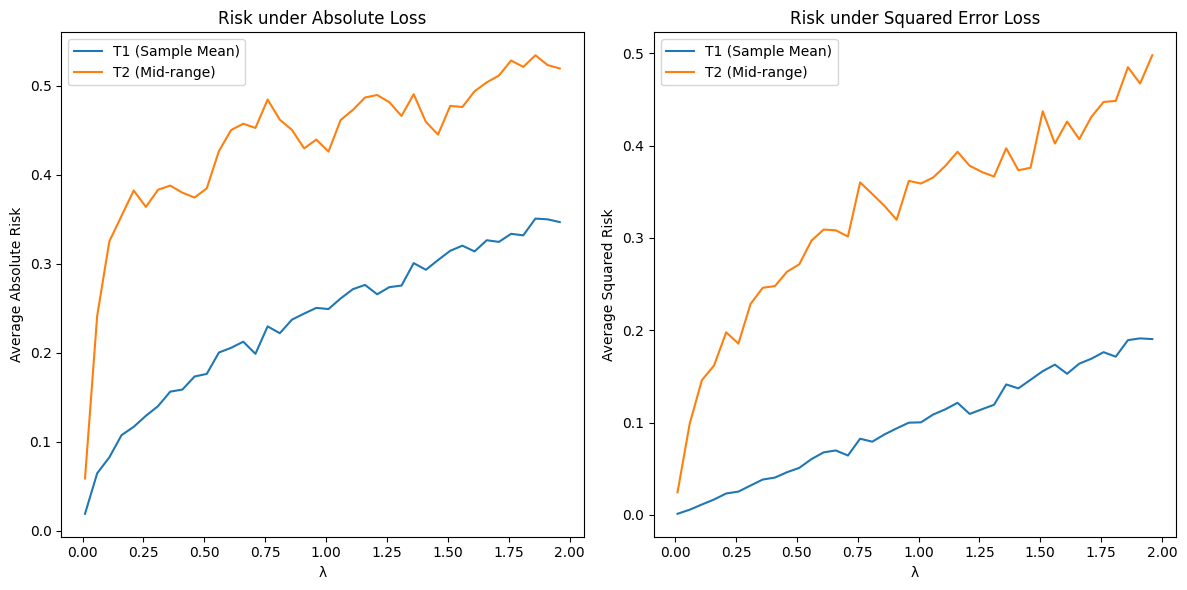

I would prefer the T1 estimators for both the losses as the it is below T2


In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Initialize lists to store risks for T1 and T2
absolute_risk_T1 = []
squared_risk_T1 = []
absolute_risk_T2 = []
squared_risk_T2 = []

# Range of lambda values to consider
λ = np.arange(0.01, 2, 0.05)

# Monte Carlo simulation for each lambda value
for lam in λ:
    n = 10
    M = 1000  # Note: Use a consistent number of simulations
    
    # Initialize lists to store losses for T1 and T2
    absolute_loss_T1 = []
    squared_loss_T1 = []
    absolute_loss_T2 = []
    squared_loss_T2 = []
    
    # Monte Carlo simulation
    for i in range(M):
        # Generate Poisson random variables
        x = np.random.poisson(lam, n)
        
        # Estimator T1: Sample mean
        T1 = np.mean(x)
        absolute_loss_T1.append(abs(T1 - lam))
        squared_loss_T1.append((T1 - lam)**2)
        
        # Estimator T2: Mid-range
        T2 = (np.max(x) + np.min(x)) / 2
        absolute_loss_T2.append(abs(T2 - lam))
        squared_loss_T2.append((T2 - lam)**2)
    
    # Calculate average risks for T1 and T2
    absolute_risk_T1.append(np.mean(absolute_loss_T1))
    squared_risk_T1.append(np.mean(squared_loss_T1))
    absolute_risk_T2.append(np.mean(absolute_loss_T2))
    squared_risk_T2.append(np.mean(squared_loss_T2))

# Plotting the risk functions for T1 and T2
plt.figure(figsize=(12, 6))

# Plot for absolute loss
plt.subplot(1, 2, 1)
plt.plot(λ, absolute_risk_T1, label="T1 (Sample Mean)")
plt.plot(λ, absolute_risk_T2, label="T2 (Mid-range)")
plt.title("Risk under Absolute Loss")
plt.xlabel("λ")
plt.ylabel("Average Absolute Risk")
plt.legend()

# Plot for squared error loss
plt.subplot(1, 2, 2)
plt.plot(λ, squared_risk_T1, label="T1 (Sample Mean)")
plt.plot(λ, squared_risk_T2, label="T2 (Mid-range)")
plt.title("Risk under Squared Error Loss")
plt.xlabel("λ")
plt.ylabel("Average Squared Risk")
plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()
print('I would prefer the T1 estimators for both the losses as the it is below T2')


#### Part - II

#### a)

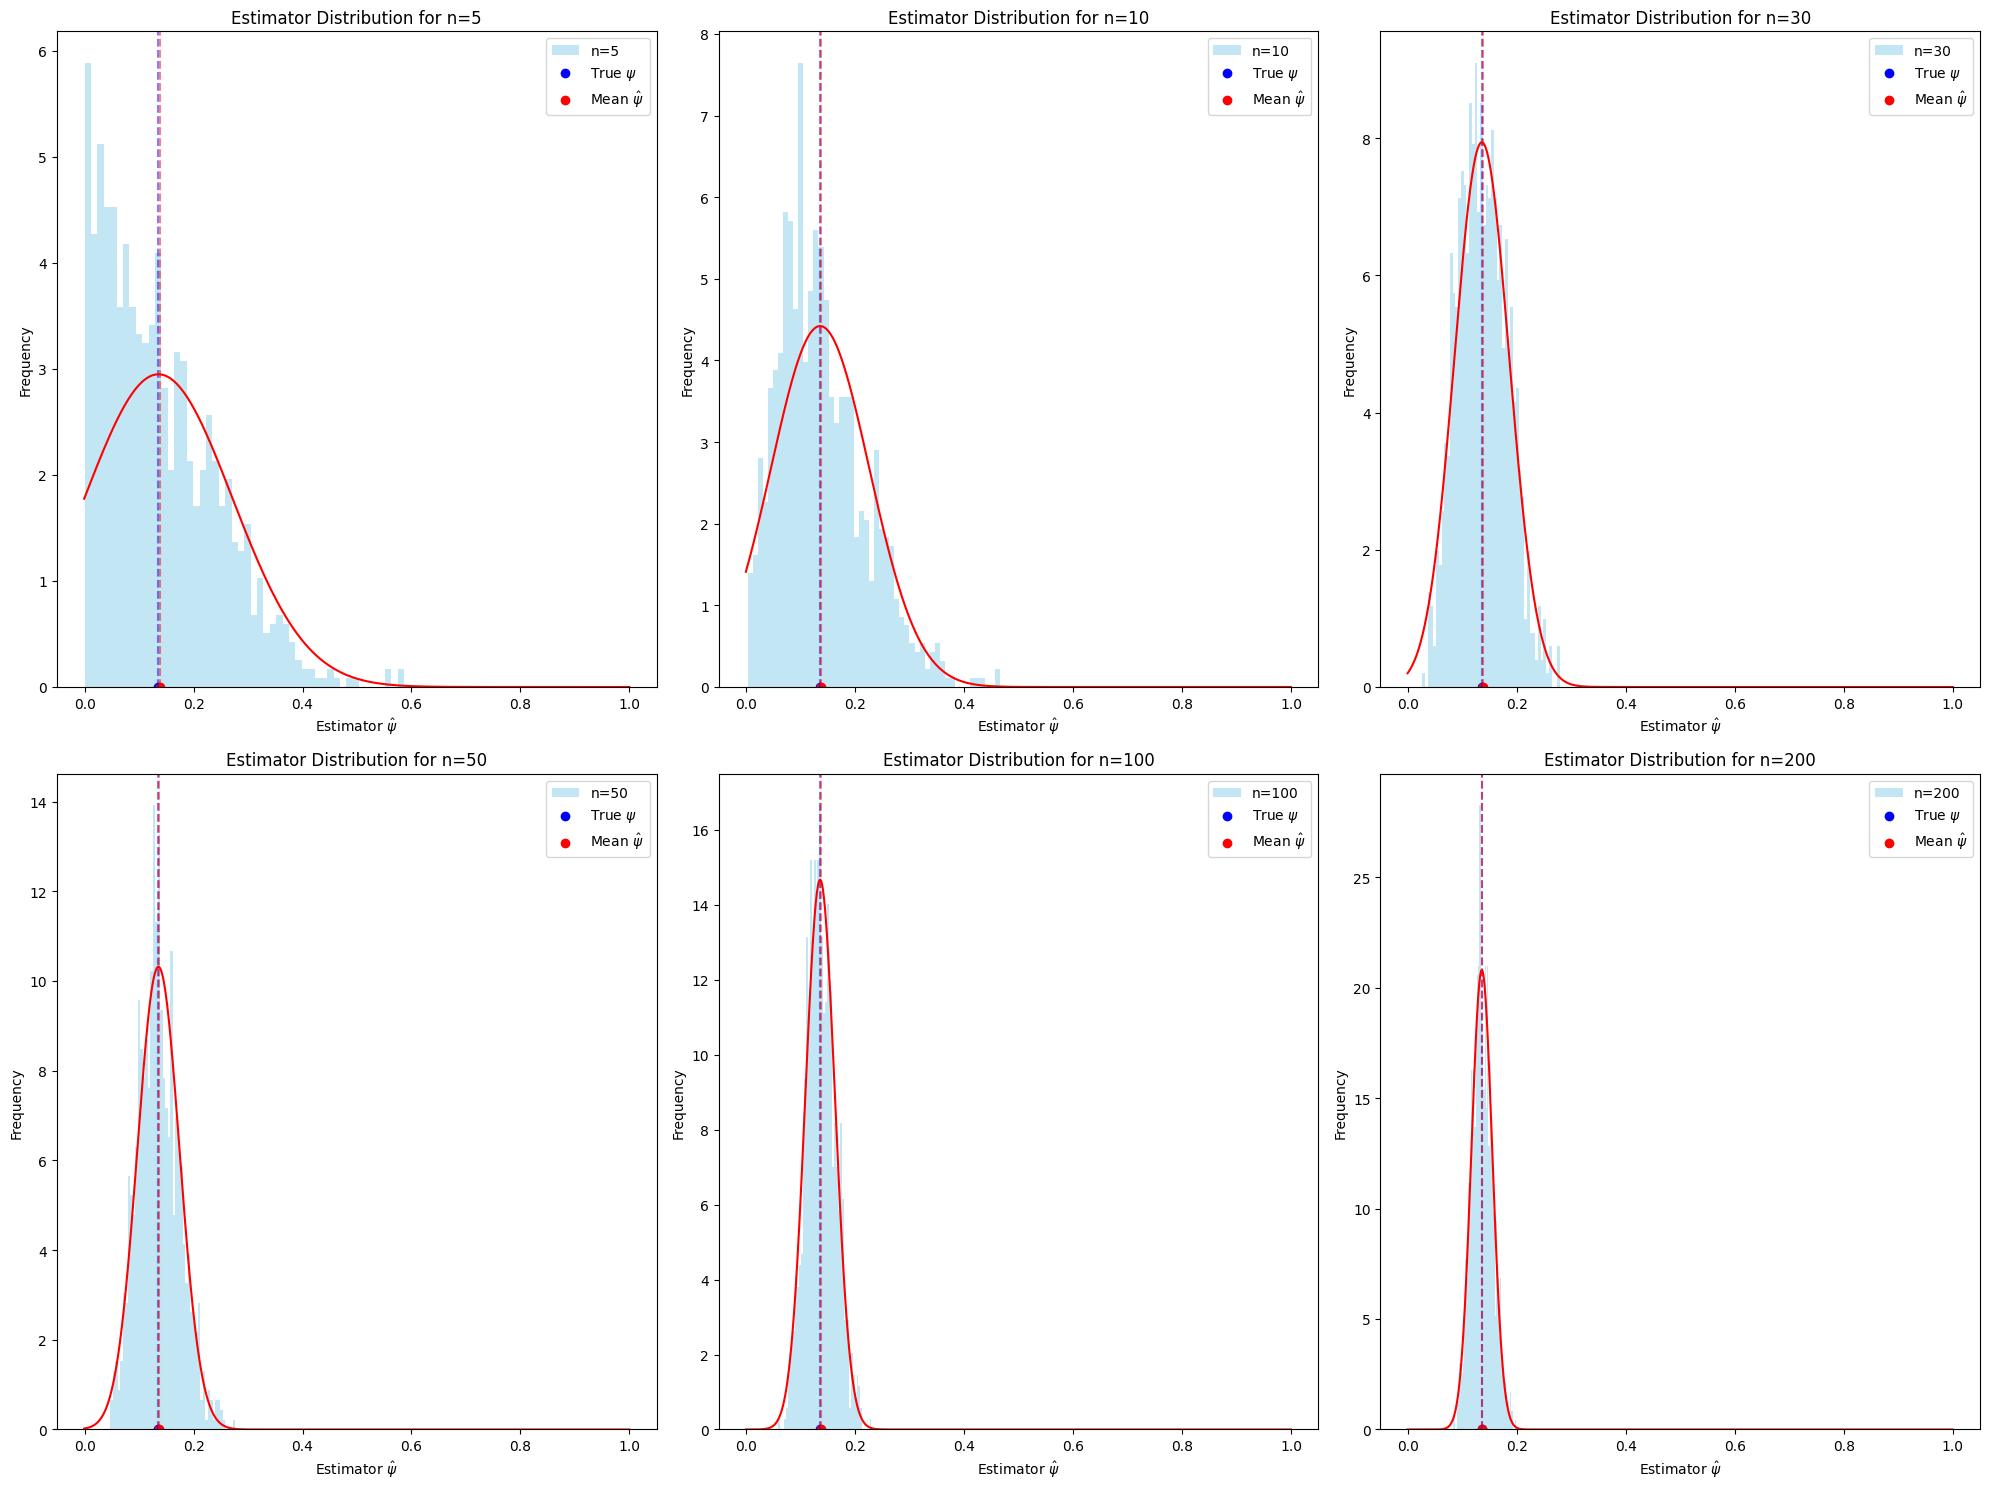

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# True parameter λ and true value of psi
λ = 2
psi = np.exp(-λ)

# List of sample sizes to consider
n = [5, 10, 30, 50, 100, 200]
M = 1000  # Number of simulations

# Plotting
plt.figure(figsize=(20, 15))

for i in range(len(n)):
    psi_hat = []
    plt.subplot(2, 3, i + 1)
    
    # Monte Carlo simulation for the current sample size
    for _ in range(M):
        # Generate n exponential random variables
        x = np.random.exponential(scale=1/λ, size=n[i])
        # Calculate estimator psi_hat
        psi_hat.append(np.exp(-1 / np.mean(x)))
    
    # Plot histogram of psi_hat
    plt.hist(psi_hat, bins=50, label=f"n={n[i]}", alpha=0.5, color='skyblue',density = True)
    
    # Plot true value of psi (blue dot)
    plt.scatter(psi, 0, color='blue', label=r'True $\psi$')
    
    # Plot mean of psi_hat (red dot)
    plt.scatter(np.mean(psi_hat), 0, color='red', label=r'Mean $\hat{\psi}$')
    
    plt.title(f"Estimator Distribution for n={n[i]}")
    plt.xlabel(r"Estimator $\hat{\psi}$")
    plt.ylabel("Frequency")
    plt.axvline(x=psi, color='blue', linestyle='--',alpha = 0.5)  # Vertical line at true $\psi$
    plt.axvline(x=np.mean(psi_hat), color='red', linestyle='--',alpha = 0.5)  # Vertical line at mean $\hat{\psi}$
    #for overlaying normal distribution refer to (b) statement for detail 
    mean = psi
    sd = np.sqrt((λ**2 * np.exp(-2*λ)) / (n[i]-1))
    import scipy.stats as st
    x_vals = np.linspace(-0.001,1,1000)
    plt.plot(x_vals,st.norm.pdf(x_vals,mean,sd),color = 'red')
    
    plt.legend()

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()


#### c)


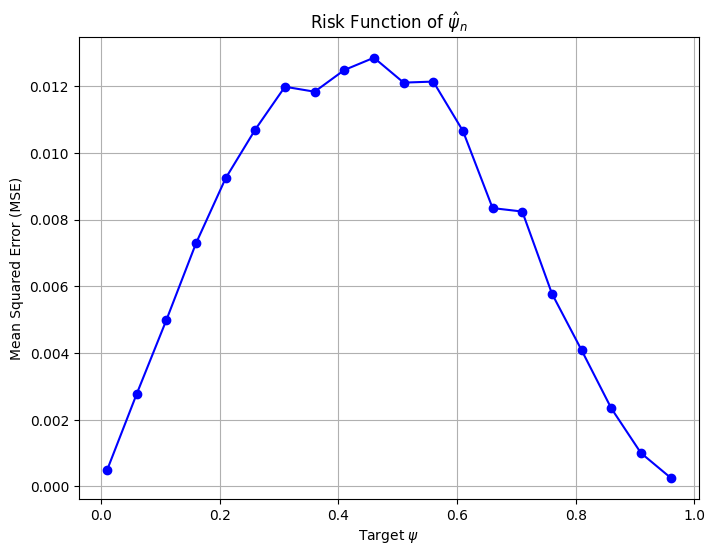

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Define the range of target psi values
psi_vals = np.arange(0.01, 0.99, 0.05)

# Number of Monte Carlo simulations and sample size
M = 1000
n = 10

# List to store mean squared errors (MSEs) for each target psi
psi_mse = []

# Iterate over each target psi value
for psi in psi_vals:
    # Calculate the corresponding lambda based on the relationship psi = e^(-lambda)
    λ = -np.log(psi)
    
    # List to store squared errors (losses) for current psi
    psi_loss = []
    
    # Monte Carlo simulation for current psi
    for _ in range(M):
        # Generate n exponential random variables with rate lambda
        x = np.random.exponential(scale=1/λ, size=n)
        
        # Compute the estimator psi_hat
        psi_hat = np.exp(-1 / np.mean(x))
        
        # Calculate squared error (loss) and append to the list
        psi_loss.append((psi_hat - psi)**2)
    
    # Calculate the mean squared error (MSE) for the current target psi
    psi_mse.append(np.mean(psi_loss))
    
# Plot the MSE of psi_hat as a function of target psi values
plt.figure(figsize=(8, 6))
plt.plot(psi_vals, psi_mse, marker='o', color='b', linestyle='-')
plt.title(r'Risk Function of $\hat{\psi}_n$')
plt.xlabel(r'Target $\psi$')
plt.ylabel('Mean Squared Error (MSE)')
plt.grid(True)
plt.show()


#### d)

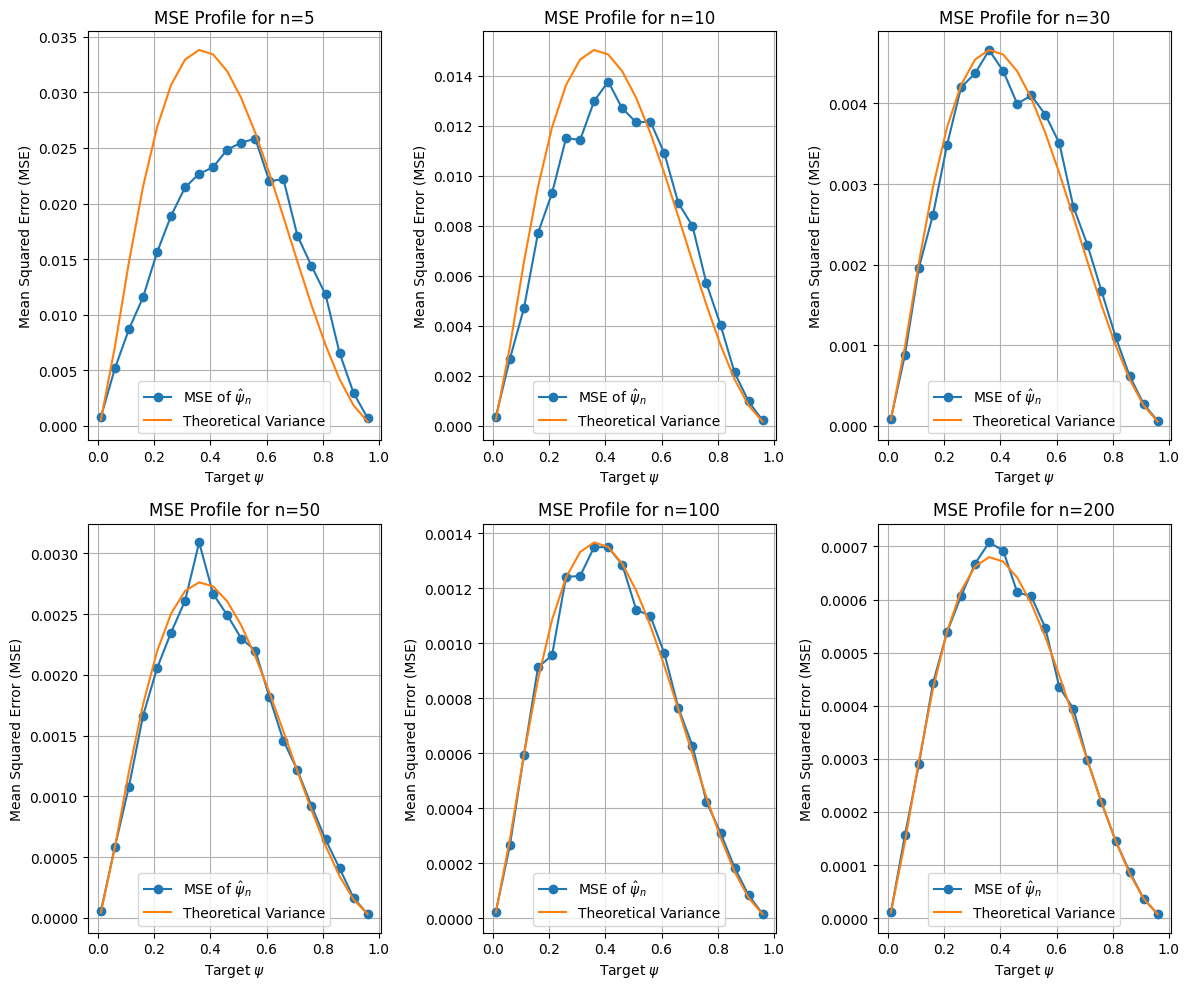

In [5]:
# draw the mse profile for different values of n 
import numpy as np
import matplotlib.pyplot as plt

def var_psi_psihat(psi, n):
    λ = -np.log(psi)
    return (λ**2 * psi**2) / (n - 1) # Mse/ var check notes for derivation and write it here later

n_vals = [5, 10, 30, 50, 100, 200]
plt.figure(figsize=(12, 10))

for i in range(len(n_vals)):
    plt.subplot(2, 3, i + 1)
    n = n_vals[i]
    psi_vals = np.arange(0.01, 0.99, 0.05)
    M = 1000
    psi_mse = []

    for psi in psi_vals:
        λ = -np.log(psi)
        psi_loss = []

        for _ in range(M):
            x = np.random.exponential(1/λ, n)
            psi_hat = np.exp(-1 / np.mean(x))
            psi_loss.append((psi_hat - psi)**2)

        psi_mse.append(np.mean(psi_loss))

    plt.plot(psi_vals, psi_mse, marker='o', label=r'MSE of $\hat{\psi}_n$')
    plt.plot(psi_vals, var_psi_psihat(psi_vals, n), label='Theoretical Variance')
    plt.title(f'MSE Profile for n={n}')
    plt.xlabel(r'Target $\psi$')
    plt.ylabel('Mean Squared Error (MSE)')
    plt.grid(True)
    plt.legend()

plt.tight_layout()
plt.show()
